# 1. Data Exploration

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Load the data
df = pd.read_csv('Employee (1).csv')

# Display basic info
print("Data shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nData types:")
print(df.dtypes)

# Unique values and their counts
print("\nUnique values in each column:")
for col in df.columns:
    print(f"\n{col}:")
    print(df[col].value_counts(dropna=False))
    print(f"Length of unique values: {len(df[col].unique())}")

# Statistical analysis
print("\nStatistical summary:")
print(df.describe(include='all'))

# Rename columns for consistency
df = df.rename(columns={
    'Company': 'company',
    'Age': 'age',
    'Salary': 'salary',
    'Place': 'place',
    'Country': 'country',
    'Gender': 'gender'
})
print("\nColumns after renaming:", df.columns.tolist())

Data shape: (148, 6)

First 5 rows:
   Company   Age  Salary     Place Country  Gender
0      TCS  20.0     NaN   Chennai   India       0
1  Infosys  30.0     NaN    Mumbai   India       0
2      TCS  35.0  2300.0  Calcutta   India       0
3  Infosys  40.0  3000.0     Delhi   India       0
4      TCS  23.0  4000.0    Mumbai   India       0

Data types:
Company     object
Age        float64
Salary     float64
Place       object
Country     object
Gender       int64
dtype: object

Unique values in each column:

Company:
Company
TCS                          53
Infosys                      45
CTS                          36
NaN                           8
Tata Consultancy Services     2
Congnizant                    2
Infosys Pvt Lmt               2
Name: count, dtype: int64
Length of unique values: 7

Age:
Age
NaN     18
22.0    16
33.0    13
44.0    10
21.0     8
23.0     8
34.0     8
32.0     7
35.0     6
0.0      6
41.0     5
43.0     4
24.0     4
45.0     4
31.0     3
25.0     3
20.0 

# 2. Data Cleaning


Missing values before cleaning:
company     8
age        18
salary     24
place      14
country     0
gender      0
dtype: int64

Shape after removing duplicates: (144, 6)


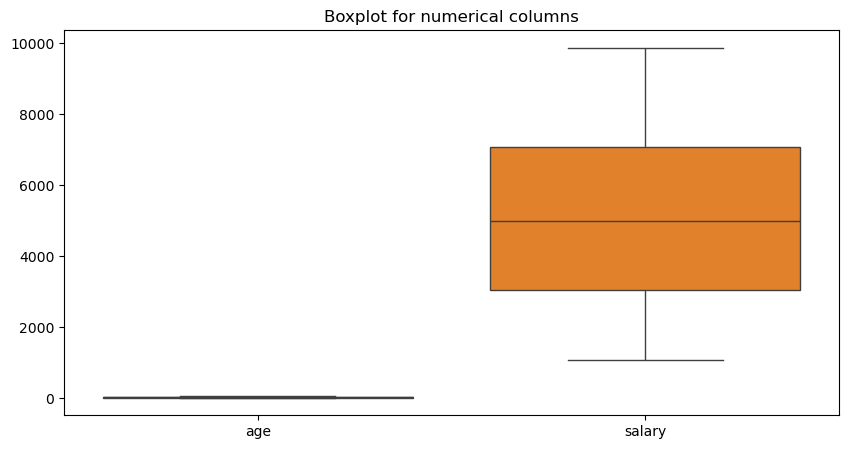


Missing values after cleaning:
company    0
age        0
salary     0
place      0
country    0
gender     0
dtype: int64


In [8]:
# Check for missing values
print("\nMissing values before cleaning:")
print(df.isnull().sum())

# Remove duplicate rows
df = df.drop_duplicates()
print("\nShape after removing duplicates:", df.shape)

# Replace 0 in age with NaN
df['age'] = df['age'].replace(0, np.nan)

# Treat missing values
# For numerical columns
df['age'] = df['age'].fillna(df['age'].median())
df['salary'] = df['salary'].fillna(df['salary'].median())

# For categorical columns
df['company'] = df['company'].fillna('Unknown')
df['place'] = df['place'].fillna('Unknown')

# Check for outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['age', 'salary']])
plt.title('Boxplot for numerical columns')
plt.show()

# Remove rows with missing country (though none in this dataset)
df = df.dropna(subset=['country'])

print("\nMissing values after cleaning:")
print(df.isnull().sum())

# 3. Data Analysis


Filtered data (age > 40 and salary < 5000):
     company   age  salary      place country  gender
21   Infosys  50.0  3184.0      Delhi   India       0
32   Infosys  45.0  4034.0   Calcutta   India       0
39   Infosys  41.0  3000.0     Mumbai   India       0
50   Infosys  41.0  3000.0    Chennai   India       0
57   Infosys  51.0  3184.0  Hyderabad   India       0
68   Infosys  43.0  4034.0     Mumbai   India       0
75   Infosys  44.0  3000.0     Cochin   India       0
86   Infosys  41.0  3000.0      Delhi   India       0
93   Infosys  54.0  3184.0     Mumbai   India       0
104  Infosys  44.0  4034.0      Delhi   India       0
122  Infosys  44.0  3234.0     Mumbai   India       0
129  Infosys  50.0  3184.0   Calcutta   India       0
138      CTS  44.0  3033.0     Cochin   India       0
140  Infosys  44.0  4034.0  Hyderabad   India       0
145  Infosys  44.0  4034.0      Delhi   India       1


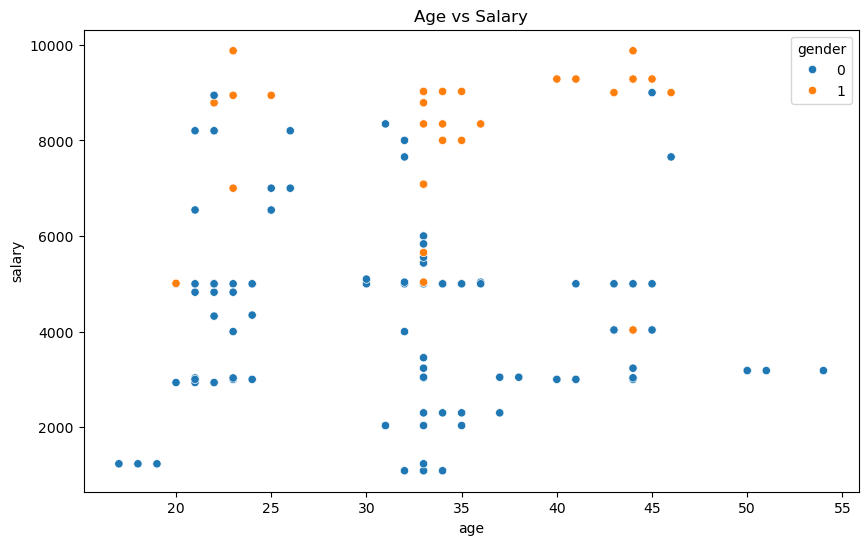

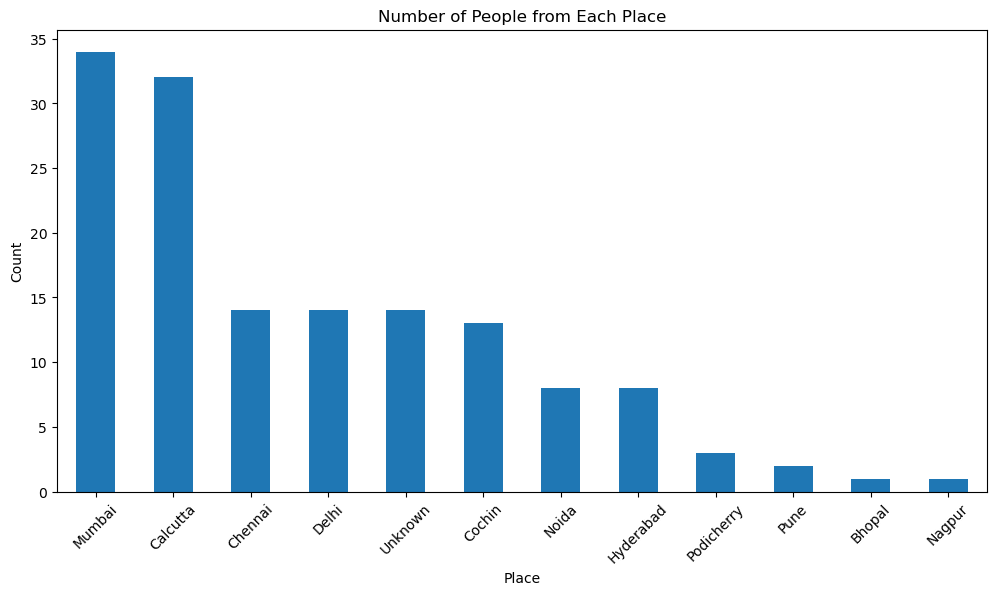

In [11]:
# Filter data
filtered_df = df[(df['age'] > 40) & (df['salary'] < 5000)]
print("\nFiltered data (age > 40 and salary < 5000):")
print(filtered_df)

# Plot age vs salary
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='salary', hue='gender')
plt.title('Age vs Salary')
plt.show()

# Count people from each place
place_counts = df['place'].value_counts()
plt.figure(figsize=(12, 6))
place_counts.plot(kind='bar')
plt.title('Number of People from Each Place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 4. Data Encoding

In [14]:
# Label encoding for binary categorical variables
df['gender'] = df['gender'].astype(int)  # Already encoded (0/1)

# One-hot encoding for other categorical variables
categorical_cols = ['company', 'place', 'country']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("\nData after encoding:")
print(df_encoded.head())


Data after encoding:
    age  salary  gender  company_Congnizant  company_Infosys  \
0  20.0  5000.0       0               False            False   
1  30.0  5000.0       0               False             True   
2  35.0  2300.0       0               False            False   
3  40.0  3000.0       0               False             True   
4  23.0  4000.0       0               False            False   

   company_Infosys Pvt Lmt  company_TCS  company_Tata Consultancy Services  \
0                    False         True                              False   
1                    False        False                              False   
2                    False         True                              False   
3                    False        False                              False   
4                    False         True                              False   

   company_Unknown  place_Calcutta  place_Chennai  place_Cochin  place_Delhi  \
0            False           False          

# 5. Feature Scaling

In [21]:
# Initialize scalers
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

# Select numerical features to scale
numerical_features = ['age', 'salary']

# Standard scaling
df_standard = df_encoded.copy()
df_standard[numerical_features] = scaler_standard.fit_transform(df_standard[numerical_features])

# Min-max scaling
df_minmax = df_encoded.copy()
df_minmax[numerical_features] = scaler_minmax.fit_transform(df_minmax[numerical_features])

print("\nData after standard scaling:")
print(df_standard[numerical_features].head())

print("\nData after min-max scaling:")
print(df_minmax[numerical_features].head())


Data after standard scaling:
        age    salary
0 -1.484676 -0.100827
1 -0.267174 -0.100827
2  0.341577 -1.243735
3  0.950328 -0.947426
4 -1.119426 -0.524127

Data after min-max scaling:
        age    salary
0  0.081081  0.445089
1  0.351351  0.445089
2  0.486486  0.137817
3  0.621622  0.217480
4  0.162162  0.331285
